<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd

In [0]:
# prayer_df = pd.read_csv('/prayer-sources.csv', 
#                         # encoding="latin-1"
#                         )
# not_prayer_df = pd.read_csv('/not-prayer-sources.csv', 
not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            # encoding="latin-1"
                            )

In [199]:
prayer_df.sample(5)

,Ref,En,He
765,Psalms 141:2-3,Let my prayer be set forth as incense before T...,תִּכּ֤וֹן תְּפִלָּתִ֣י קְטֹ֣רֶת לְפָנֶ֑יךָ מַֽ...
718,Nefesh HaChaim 2:12:4,NaN,ואף שגם רז''ל אמרו (ערובין ס''ה א') יכולני לפט...
803,Midrash Tehillim 108:1,NaN,שיר מזמור לאסף נכון לבי אלקים. זהו שאמר הכתוב ...
1016,Bava Metzia 59b:10-11,"The Gemara further relates: Imma Shalom, the w...","אימא שלום דביתהו דר""א אחתיה דר""ג הואי מההוא מע..."
787,Taanit 22b:14-16,§ The mishna further states that they sound th...,"על כל צרה שלא תבא על הצבור כו': ת""ר על כל צרה ..."


In [357]:
not_prayer_df.sample(5)

,Ref,En,He,Topics
162,Zohar 3:36a:3,NaN,"רִבִּי אֶלְעָזָר אָמַר, ג' נְהוֹרִין (צדדים אל...",cecum
8255,Yevamot 66a:10,The Gemara asks: And is it so that one who doe...,ולא והרי ערל וכל הטמאים שאינן אוכלין ומאכילין ...,mouths|financial-ramifications-of-marriage|law...
7664,Chullin 112a:3,§ Rav Dimi inquired of Rav Naḥman: What is the...,בעא מיניה רב דימי מרב נחמן מהו לאנוחי כדא דמלח...,laws-of-the-prohibitions-of-eating-meat
9670,Darashos HaRan 1:37,Required next in this orderly progression are ...,והנה מתחייב אחר זה בסדר ובמדרגה שיהיו נעשים הש...,creation-of-heavens-and-earth|light
10109,Avodah Zarah 53b:11,The Gemara suggests: Say that whatever asherim...,אימא כל דבהדי עגל ניתסרו מכאן ואילך נישתרי מאן...,laws-of-objects-of-foreign-worship


In [201]:
prayer_df['topic'] = 'prayer'
prayer_df = prayer_df[['En','topic']]
prayer_df.tail(3)

,En,topic
1049,"It is true that you are the one who judges, an...",prayer
1050,In these Berachot (blessings) we bow down: the...,prayer
1051,On seeds he says [the Beracha (blessing)] Bore...,prayer


In [202]:
prayer_df.shape

(1052, 2)

In [358]:
not_prayer_df['topic'] = 'not_prayer'
not_prayer_df = not_prayer_df[['En','topic']]
not_prayer_df.tail(3)

,En,topic
10498,§ The Gemara continues to discuss the prohibit...,not_prayer
10499,NaN,not_prayer
10500,The Gemara interprets a subsequent verse: “We ...,not_prayer


In [359]:
not_prayer_df.shape

(10501, 2)

In [395]:
all_prayer_frames = [prayer_df, not_prayer_df]
all_prayer_df = pd.concat(all_prayer_frames)
all_prayer_df.sample(5)

,En,topic
2487,NaN,not_prayer
10234,NaN,not_prayer
9196,NaN,not_prayer
953,NaN,not_prayer
758,With all this there is no doubt that when Esau...,not_prayer


In [396]:
all_prayer_df.dropna(inplace=True)
all_prayer_df.sample(5)

,En,topic
3048,GEMARA: With regard to the ruling that a guara...,not_prayer
550,"At that time, Moses was prolonging his prayer....",prayer
52,Ravina said to Rav Ashi: And according to the ...,not_prayer
1847,The Gemara asks: And from where is it inferred...,not_prayer
123,The baraita continues: But if the script was i...,prayer


In [397]:
all_prayer_df = all_prayer_df.apply(lambda x: x.astype(str).str.lower())
all_prayer_df.sample(5)

,En,topic
7505,don't exert your mind in any field of wisdom e...,not_prayer
8096,and ben nanas holds that what the creditor has...,not_prayer
6323,אם הכהן המשיח יחטא לאשמת העם if the priest tha...,not_prayer
8547,the gemara analyzes the conduct of shmuel’s fa...,not_prayer
534,rabbi elazar asked rav: what is the status of ...,not_prayer


In [398]:
print(all_prayer_df.shape)
all_prayer_df.drop_duplicates(inplace=True)
print(all_prayer_df.shape)

(6973, 2)
(6946, 2)


In [399]:
all_prayer_df.isnull().sum()

En       0
topic    0
dtype: int64

In [400]:
all_prayer_df.sample(5)

,En,topic
6545,one who launders is liable on account of white...,not_prayer
9352,the lord saw that leah was hated (gen. 29:17)....,not_prayer
3137,"come and behold, since esau followed on the se...",not_prayer
9785,the gemara analyzes the mishna in accordance w...,not_prayer
7532,§ in the previous baraita the sages derived fr...,not_prayer


In [0]:
all_prayer_df['topic'] = all_prayer_df['topic'].map({'not_prayer': 0, 'prayer': 1})

In [402]:
all_prayer_df.sample(5)

,En,topic
9753,and if you say that a limb upon which there is...,0
441,the master said above that five watches are ke...,0
1187,in the school of rav anan it was taught: what ...,0
8720,the gemara questions how the court can rely up...,0
7208,abaye raised another objection: this works out...,0


In [0]:
import nltk
# nltk.download('stopwords')
import string
from nltk.corpus import stopwords

def process_text(text):
    '''
    1. Keep only letters and spaces
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    chars_lst = [char.lower() for char in text if char in string.ascii_letters or char == ' ']
    # nopunc = []
    # for char in text:
    #     if char in string.ascii_letters or char == ' ':
    #         nopunc.append(char)
    chars_str = ''.join(chars_lst)
    
    #2
    clean_words = [word for word in chars_str.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [404]:
sample_text = 'aBC.!@#$%^&         liuhi u du sid c*('
process_text(sample_text)

['abc', 'liuhi', 'u', 'du', 'sid', 'c']

In [405]:
all_prayer_df['En'].head().apply(process_text)

0    [another, abba, binyamins, statements, regard,...
1    [taught, baraita, abba, binyamin, said, ones, ...
2    [additionally, ravin, bar, rav, adda, said, ra...
3    [similarly, taught, baraita, rabbi, yishmael, ...
4    [meaning, written, let, prayer, unto, lord, ti...
Name: En, dtype: object

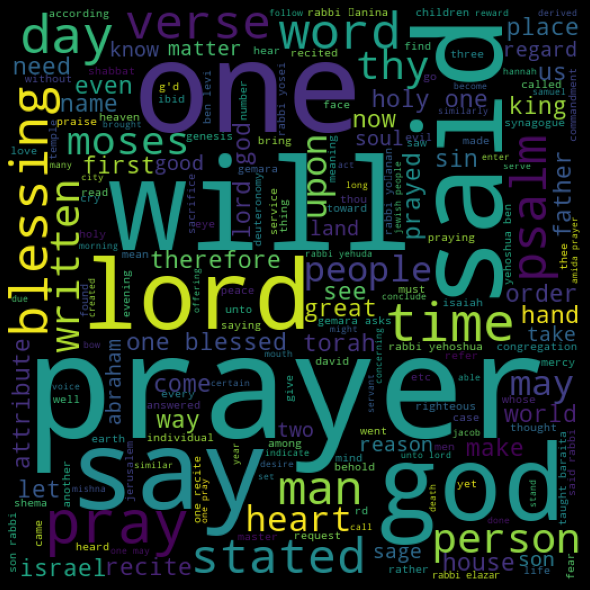

In [406]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['topic'] == 1]['En']))
prayer_wc = WordCloud(width = 512,height = 512).generate(prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

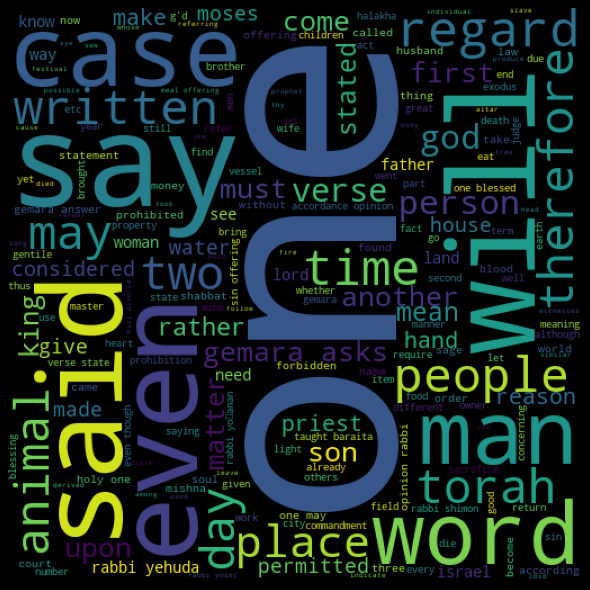

In [407]:
not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['topic'] == 0]['En']))
not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [431]:
# Convert a collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# vectorizer = # vectorizer = CountVectorizer(analyzer=process_text)
# vectorizer = CountVectorizer(ngram_range=(2, 4))
# vectorizer = HashingVectorizer(ngram_range=(2, 4),alternate_sign=False)
vectorizer = TfidfVectorizer(ngram_range=(2, 4))

prayer_bag_of_words = vectorizer.fit_transform(all_prayer_df['En'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prayer_bag_of_words, 
                                                    all_prayer_df['topic'], test_size=0.20, random_state=0)
# shape of prayer bag of words
prayer_bag_of_words.shape
# Create and train the naive Bayes classifier
# The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)


from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB

classifier = MultinomialNB()
# classifier = ComplementNB()

# for Gaussian need array format
# X_train = X_train.toarray()
# X_test = X_test.toarray()
# classifier = GaussianNB()
# classifier = BernoulliNB()

classifier.fit(X_train, y_train)

# Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("TRAINING")
y_pred = classifier.predict(X_train)
print(classification_report(y_train, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_train, y_pred))
print('\nAccuracy: ',accuracy_score(y_train, y_pred))

print("\n\nTESTING")
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('\nAccuracy: ',accuracy_score(y_test, y_pred))

TRAINING
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5122
           1       0.00      0.00      0.00       434

    accuracy                           0.92      5556
   macro avg       0.46      0.50      0.48      5556
weighted avg       0.85      0.92      0.88      5556

Confusion Matrix:
 [[5122    0]
 [ 434    0]]

Accuracy:  0.921886249100072


TESTING
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1271
           1       0.00      0.00      0.00       119

    accuracy                           0.91      1390
   macro avg       0.46      0.50      0.48      1390
weighted avg       0.84      0.91      0.87      1390

Confusion Matrix:
 [[1271    0]
 [ 119    0]]

Accuracy:  0.9143884892086331


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [432]:
y_test = np.asarray(y_test)
misclassified = np.where(y_test != classifier.predict(X_test))
misclassified

(array([  10,   52,   58,   61,   65,   69,   73,   79,   80,   85,   89,
         109,  113,  120,  123,  136,  151,  157,  158,  184,  192,  211,
         248,  249,  251,  270,  279,  290,  292,  332,  340,  366,  380,
         397,  401,  407,  408,  415,  417,  446,  451,  456,  458,  466,
         470,  497,  509,  519,  535,  547,  553,  581,  591,  620,  640,
         663,  669,  672,  715,  727,  729,  735,  742,  751,  752,  753,
         783,  786,  804,  809,  819,  828,  843,  849,  882,  895,  898,
         912,  914,  919,  920,  954,  973, 1013, 1014, 1021, 1029, 1041,
        1050, 1067, 1081, 1103, 1113, 1116, 1142, 1151, 1156, 1159, 1169,
        1177, 1186, 1201, 1220, 1232, 1240, 1241, 1251, 1260, 1265, 1281,
        1289, 1313, 1316, 1325, 1330, 1347, 1362, 1368, 1388]),)

In [434]:
pd.set_option('display.expand_frame_repr', False)
all_prayer_df.iloc[misclassified]

,En,topic
10,the gemara raises an objection based on a bara...,1
52,§ the gemara cites a series of questions that ...,1
59,by five names is the soul/nefesh called: nefes...,1
70,"3 another interpretation of, ""and you shall ta...",1
83,and moses and aaron went out from pharaoh; and...,1
...,...,...
1228,"similarly, rabbi abbahu said: why does one sou...",0
1256,"and pharaoh turned and went into his house, ne...",0
1285,the gemara turns to the matter itself mentione...,0
1295,"rava, the expert in tosefta , said to ravina: ...",0
